In [2]:
import soundfile as sf   # We use this one to read and write sound file
import math # basic math functions
import io # We use this one for basic file input/output operations
import numpy as np   # We use this one to do numerical operations
import scipy.fftpack as fftpack # We use this one to perform Fourier transforms
import urllib.request as request  # We use this one to get things from the web
import matplotlib.pyplot as plt  # We use this one to plot things
# The next line causes matplotlib to put its plots in this webpage.  That's reasonable for small spectrograms, maybe less than one second.
%matplotlib inline

In [3]:
file_path = '/Users/hom/dev/Speech Interface/proj1_sample_32PCM_16k.wav'


p_data, p_fs = sf.read(file_path)
# Let's save both of those files in the current directory, so we can read them using other programs
# Let's save them as WAV; it's a big file, but can be opened by a wider variety of programs
# sf.write('pride_and_prejudice_part1.wav',p_data,p_fs)
# sf.write('white_fang_part1.wav',w_data,w_fs)
print(p_data)
print(len(p_data))
print(p_fs)

[ 0.00120395  0.00403605  0.00057629 ... -0.00021022  0.00037785
  0.        ]
351542
16000


# 1. Wav file plot

Text(0.5, 1.0, 'wav file plot')

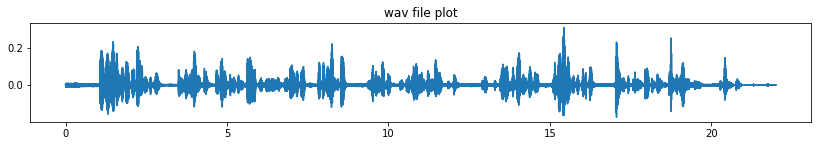

In [73]:
p_wav = p_data
# We'll use the numpy function "linspace" to create a time axis for plotting
p_timeaxis = np.linspace(0,22,len(p_wav))

# And plot them
f1=plt.figure(1,figsize=(14,4))
plt.subplot(211)
plt.plot(p_timeaxis,p_wav)
plt.title('wav file plot')


# 2. Window hanning and hanning window plot

In [75]:
def enframe(x,S,L):
   # w = 0.54*np.ones(L)
    #for n in range(0,L):
     #   w[n] = w[n] - 0.46*math.cos(2*math.pi*n/(L-1))
    w = np.hanning(L)
    frames = []
    nframes = 1+int((len(x)-L)/S)
    for t in range(0,nframes):
        frames.append(np.copy(x[(t*S):(t*S+L)])*w)
    return(frames)


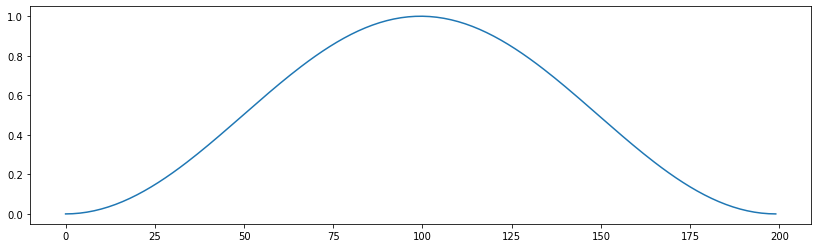

In [76]:
w = np.hanning(200)
f2 = plt.figure(figsize=(14,4))
plt.plot(w)

# 3. Convolution signal and windows
 - show just one frame

16000
16000
1097


Text(0.5, 1.0, 'A frame')

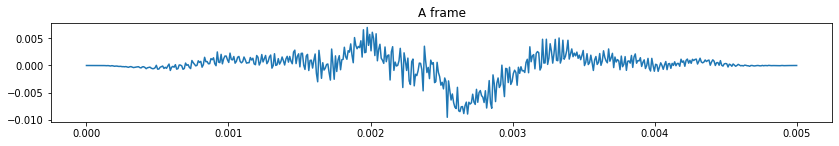

In [78]:

print(p_fs)
print(p_fs)
p_frames = enframe(p_wav,int(0.02*p_fs),int(0.035*p_fs))
print(len(p_frames))
plt.figure(figsize=(14,4))
plt.subplot(211)
#plt.plot(np.linspace(0,0.005,len(w_frames[11])),w_frames[11])
#plt.title('A frame from White Fang')
#plt.subplot(212)
plt.plot(np.linspace(0,0.005,len(p_frames[11])),p_frames[11])
plt.title('A frame')

# 4. FFT with Frame

In [84]:
def stft(frames,N,Fs):
    stft_frames = [ fftpack.fft(x,N) for x in frames]
    freq_axis = np.linspace(0,Fs,N)
    return(stft_frames, freq_axis)


# 5.Magnitude plot

1097


Text(0.5, 0, 'Frequency (Hertz)')

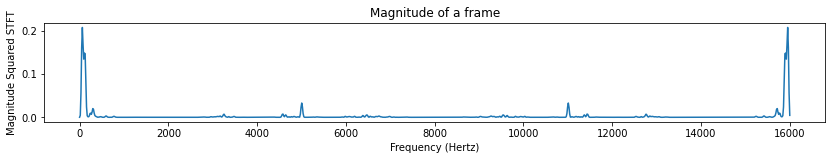

In [83]:
#(w_stft, w_freqaxis) = stft(w_frames, 1024, w_fs)
(p_stft, p_freqaxis) = stft(p_frames, 1024, p_fs)
#(p_stft, p_freqaxis) = stft2(p_frames, p_fs)
plt.figure(figsize=(14,4))
plt.subplot(211)
print(len(p_stft))
#plt.plot(p_freqaxis,abs(p_stft[11])**2)
plt.plot(p_freqaxis,abs(p_stft[11])**2)
#plt.plot(w_freqaxis,np.log(np.maximum(1,abs(w_stft[11])**2)))
plt.ylabel('Magnitude Squared STFT')
plt.title('Magnitude of a frame')
plt.xlabel('Frequency (Hertz)')


# 6. Phase plot

1097


Text(0.5, 0, 'Frequency (Hertz)')

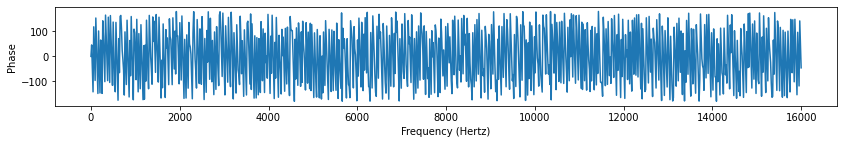

In [85]:
plt.figure(figsize=(14,4))
plt.subplot(211)
print(len(p_stft))
#plt.plot(p_freqaxis,abs(p_stft[11])**2)
#np.angle(Y)*180/np.pi
plt.plot(p_freqaxis,np.angle(p_stft[11])*180/np.pi)
#plt.plot(w_freqaxis,np.log(np.maximum(1,abs(w_stft[11])**2)))
plt.ylabel('Phase')
plt.xlabel('Frequency (Hertz)')

- plot for lower 8000 frequency

Text(0.5, 0, 'Frequency (Hertz)')

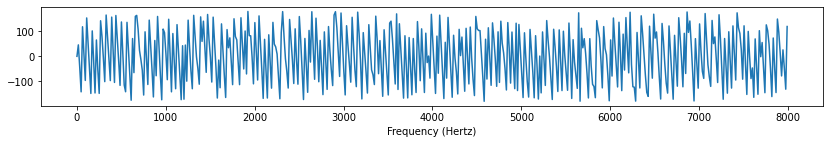

In [88]:
plt.figure(figsize=(14,4))
plt.subplot(211)
plt.plot(p_freqaxis[p_freqaxis<=8000],np.angle(p_stft[11][p_freqaxis<=8000])*180/np.pi)
#plt.plot(p_freqaxis[p_freqaxis<=8000],np.log(np.angle(p_stft[11][p_freqaxis<=8000])*180/np.pi))
plt.xlabel('Frequency (Hertz)')

# 7. Level change

In [94]:
def stft2level(stft_spectra,max_freq_bin):
    magnitude_spectra = [ abs(x) for x in stft_spectra ]
    max_magnitude = max([ max(x) for x in magnitude_spectra ])
    min_magnitude = max_magnitude / 1000.0
    for t in range(0,len(magnitude_spectra)):
        for k in range(0,len(magnitude_spectra[t])):
            magnitude_spectra[t][k] /= min_magnitude
            if magnitude_spectra[t][k] < 1:
                magnitude_spectra[t][k] = 1
    level_spectra = [ 20*np.log10(x[0:max_freq_bin]) for x in magnitude_spectra ]
    return(level_spectra)

16000


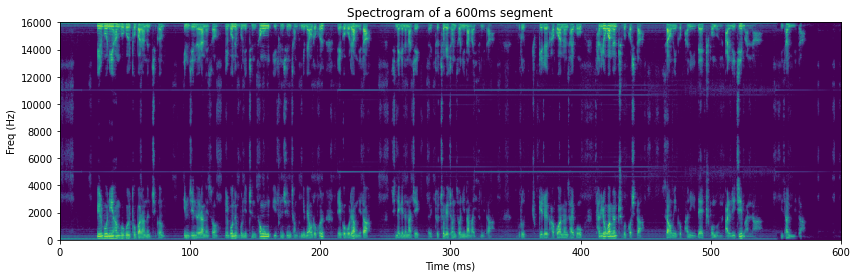

In [95]:
max_freq = 16000 # choose 16000Hz as the maximum displayed frequency
p_sgram = stft2level(p_stft, int(1024*max_freq/p_fs))
#w_sgram = stft2level(w_stft,int(1024*max_freq/w_fs))
plt.figure(figsize=(14,4))
plt.imshow(np.transpose(np.array(p_sgram)),origin='lower',extent=(0,600,0,max_freq),aspect='auto')
plt.title('Spectrogram of a 600ms segment')
plt.xlabel('Time (ms)')
plt.ylabel('Freq (Hz)')
print(p_fs)

# 8. spectogram

In [97]:
def sgram(x,frame_skip,frame_length,fft_length, fs, max_freq):
    frames = enframe(x,frame_skip,frame_length)
    (spectra, freq_axis) = stft(frames, fft_length, fs)
    sgram = stft2level(spectra, int(max_freq*fft_length/fs))
    max_time = len(frames)*frame_skip/fs
    return(sgram, max_time, max_freq)

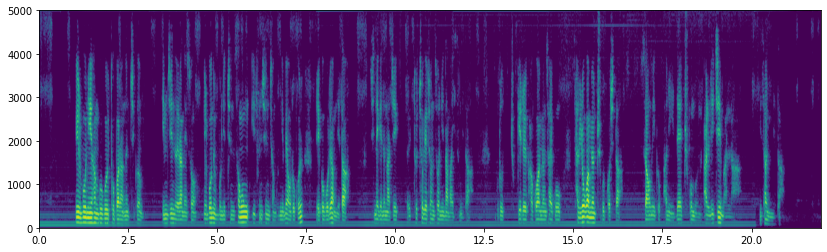

In [98]:
(p_sgram, p_maxtime, p_maxfreq) = sgram(p_wav, int(0.002*p_fs), int(0.035*p_fs), 1024, p_fs, 5000)
plt.figure(figsize=(14,4))
plt.imshow(np.transpose(np.array(p_sgram)),origin='lower',extent=(0,p_maxtime,0,p_maxfreq),aspect='auto')

# 9. Wideband spectrogram

Text(0, 0.5, 'Frequency (Hz)')

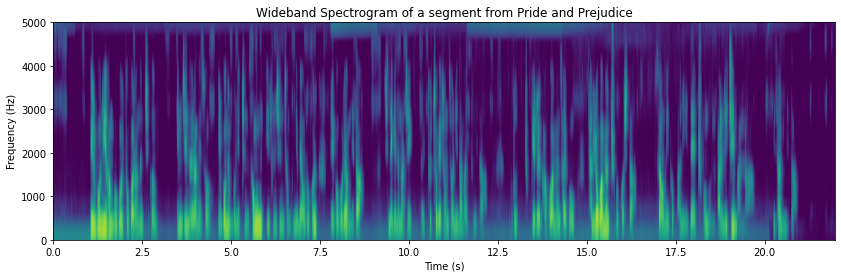

In [99]:
(p_sgram,p_maxtime, p_maxfreq) = sgram(p_wav, int(0.001*p_fs), int(0.004*p_fs), 1024, p_fs, 5000)
plt.figure(figsize=(14,4))
plt.imshow(np.transpose(np.array(p_sgram)),origin='lower',extent=(0,p_maxtime,0,p_maxfreq),aspect='auto')
plt.title('Wideband Spectrogram of a segment from Pride and Prejudice')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# 10. narrowbad spectrogram

In [ ]:
(p_sgram,p_maxtime, p_maxfreq) = sgram(p_wav, int(0.001*p_fs), int(0.025*p_fs), 1024, p_fs, 5000)
plt.figure(figsize=(14,4))
plt.imshow(np.transpose(np.array(p_sgram)),origin='lower',extent=(0,p_maxtime,0,p_maxfreq),aspect='auto')
plt.title('Narrowband Spectrogram of a segment from Pride and Prejudice')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')